In [2]:
# Install yfinance
!pip install yfinance

# Import the yfinance library
import yfinance as yf

# Extracting Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset the index
tesla_data.reset_index(inplace=True)

# Display the first five rows
tesla_data.head()

# Save the data to a CSV file
tesla_data.to_csv("tesla_stock_data.csv", index=False)



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 46.7 MB/s eta 0:00:0000:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 2.9 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.5-cp310-cp310-linux_x86_64.whl size=293379 sha256=2990e4b8fb1d96105f5ea72eb7745e4726b6666d5b26965d6afd121e932d0b1f
  Stored in directory: /root/.cache/pip/wheels/06/80/9b/98db0d58349a2f5c09f8406789ade4270762f97b7d26f2fa22
Successfully built peewee


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Send a request to the webpage containing Tesla's revenue data
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Find the correct table by inspecting the HTML
tables = soup.find_all("table")

# Debug: Print number of tables found
print(f"Number of tables found: {len(tables)}")

tesla_revenue_table = None
for table in tables:
    # Debug: Print a portion of each table to find the correct one
    if "Tesla Quarterly Revenue" in str(table):
        tesla_revenue_table = table
        break

# Check if the table was found
if tesla_revenue_table is None:
    raise ValueError("Tesla revenue table not found")

# Extract data from the table
rows = tesla_revenue_table.find_all("tr")
tesla_revenue = []

for row in rows[1:]:  # Skipping the header row
    cols = row.find_all("td")
    if len(cols) >= 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        tesla_revenue.append({"Date": date, "Revenue": revenue})

# Convert to DataFrame
tesla_revenue_df = pd.DataFrame(tesla_revenue)
tesla_revenue_df["Revenue"] = tesla_revenue_df["Revenue"].str.replace(",", "").str.replace("$", "").astype(float)

# Display the last five rows
tesla_revenue_df.tail()


In [12]:
print(response.text[:1000])  # Print the first 1000 characters of the page


<html>
<head>

</head>
<body>
<div style="margin: 50px auto; width: 50%; border: 1px solid #dfdfdf; padding: 20px 50px 30px 50px; font-family:helvetica;">

<h1>We do not allow automated access to our servers.</h1>
<h2><p>Automated access to our data is prohibited by our data provider.</p>  
<p>If you are a user attempting to access the site via a browser, please follow this process to regain access:</p>

<ul>
  <li>Go to <a href='https://whatismyipaddress.com/' target='_blank' rel='noopener noreferrer'>whatismyipaddress</a> and obtain your IPv4 address</li>
  <li>Email us your IPv4 address at <a href="/cdn-cgi/l/email-protection" class="__cf_email__" data-cfemail="4821262e270825292b3a273c3a2d262c3b66262d3c">[email&#160;protected]</a></li>
  <li>We will add you to our whitelist within 24 hours</li>
</ul>
</h2>
</div>
<script data-cfasync="false">!function(){"use strict";function e(e){try{if("undefined"==typeof console)return;"error"in console?console.error(e):console.lo


In [13]:
for table in tables:
    print(table.prettify()[:500])  # Print the first 500 characters of each table for inspection
    if "Tesla Quarterly Revenue" in str(table):
        tesla_revenue_table = table
        break


In [15]:
# Install yfinance if not already installed
!pip install yfinance

# Import yfinance
import yfinance as yf

# Extracting GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reset the index
gme_data.reset_index(inplace=True)

# Display the first five rows
print(gme_data.head())

# Save the data to a CSV file
gme_data.to_csv("gme_stock_data.csv", index=False)


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712708  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666417  1.666417  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Send a request to the webpage containing GameStop's revenue data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Find all tables in the page
tables = soup.find_all("table")

# Debug: Print number of tables found
print(f"Number of tables found: {len(tables)}")

gme_revenue_table = None
for table in tables:
    # Debug: Print a portion of each table to help identify the correct one
    print(table.prettify()[:500])  # Print the first 500 characters of each table for inspection
    if "GameStop Quarterly Revenue" in str(table):
        gme_revenue_table = table
        break

# Check if the table was found
if gme_revenue_table is None:
    raise ValueError("GameStop revenue table not found")

# Extract data from the table
rows = gme_revenue_table.find_all("tr")
gme_revenue = []

for row in rows[1:]:  # Skipping the header row
    cols = row.find_all("td")
    if len(cols) >= 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        gme_revenue.append({"Date": date, "Revenue": revenue})

# Convert to DataFrame
gme_revenue_df = pd.DataFrame(gme_revenue)
gme_revenue_df["Revenue"] = gme_revenue_df["Revenue"].str.replace(",", "").str.replace("$", "").astype(float)

# Display the last five rows
print(gme_revenue_df.tail())

# Save the data to a CSV file
gme_revenue_df.to_csv("gme_revenue_data.csv", index=False)


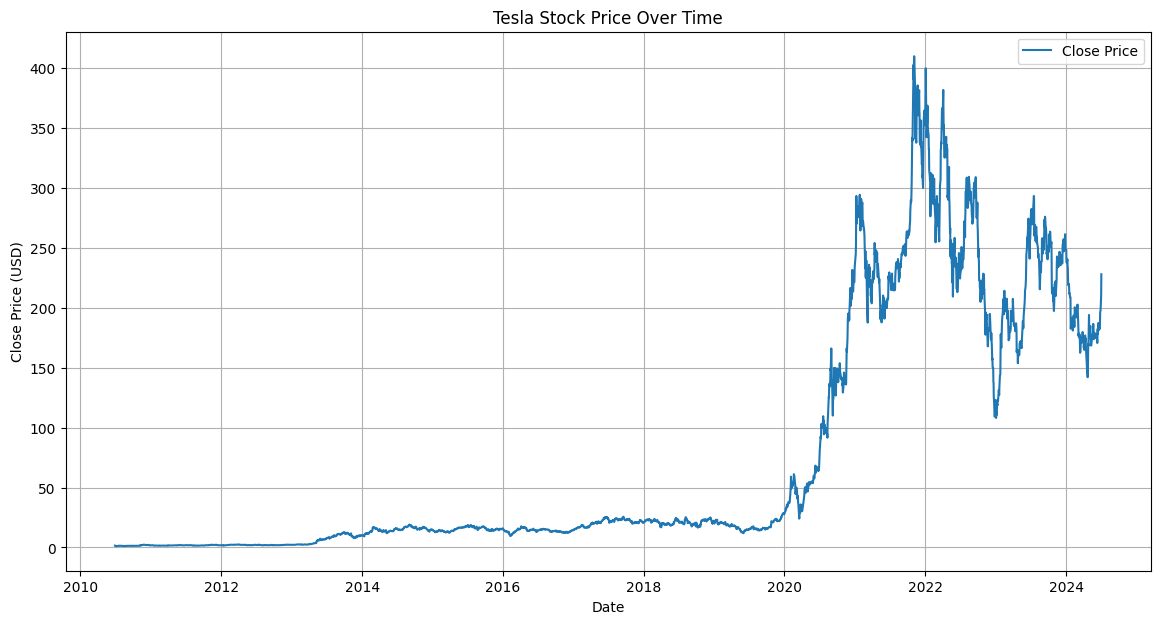

In [18]:
import yfinance as yf
import matplotlib.pyplot as plt

# Extracting Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset the index
tesla_data.reset_index(inplace=True)

# Define the make_graph function
def make_graph(data, title):
    plt.figure(figsize=(14, 7))
    plt.plot(data['Date'], data['Close'], label='Close Price')
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Use the make_graph function to plot the Tesla stock data
make_graph(tesla_data, "Tesla Stock Price Over Time")


In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Extracting GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reset the index
gme_data.reset_index(inplace=True)

# Define the make_graph function (if not already defined)
def make_graph(data, title):
    plt.figure(figsize=(14, 7))
    plt.plot(data['Date'], data['Close'], label='Close Price')
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Use the make_graph function to plot the GameStop stock data
make_graph(gme_data, "GameStop Stock Price Over Time")
In [1]:
import yfinance as yf
import matplotlib.pyplot as plt

# Extracting GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reset the index
gme_data.reset_index(inplace=True)

# Define the make_graph function
def make_graph(data, title):
    plt.figure(figsize=(14, 7))
    plt.plot(data['Date'], data['Close'], label='Close Price')
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Use the make_graph function to plot the GameStop stock data
make_graph(gme_data, "GameStop Stock Price Over Time")
